In [1]:
import pandas as pd
import os
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from lib.cux002 import *
from lib.cux003 import *

In [3]:
method= 'bicso0'

In [4]:
left_symbol = 'ims'
right_symbol = 'ics'

In [5]:
left_data = fetch_data(method=method, instruments=left_symbol).set_index('trade_time')
right_data = fetch_data(method=method, instruments=right_symbol).set_index('trade_time')

./records/bicso0/ims/basic/train_data.feather
./records/bicso0/ims/basic/val_data.feather
./records/bicso0/ims/basic/test_data.feather
./records/bicso0/ims/returns/train_returns.feather
./records/bicso0/ims/returns/val_returns.feather
./records/bicso0/ims/returns/test_returns.feather
./records/bicso0/ics/basic/train_data.feather
./records/bicso0/ics/basic/val_data.feather
./records/bicso0/ics/basic/test_data.feather
./records/bicso0/ics/returns/train_returns.feather
./records/bicso0/ics/returns/val_returns.feather
./records/bicso0/ics/returns/test_returns.feather


In [6]:
outputs = os.path.join("records", "sel", method, left_symbol)
if not os.path.exists(outputs):
    os.makedirs(outputs)

In [26]:
expressions = [
    "EMA(2,MCPS(2,'oi034_1_2_1'))", "EMA(2,MCPS(2,EMA(2,'oi034_1_2_1')))",
    "MCPS(2,'oi034_1_2_1')",
    "MRes(3,MMinDiff(2,'oi022_1_2_1'),MPWMA(4,'tv004_1_2_1','rv001_2_3_0_2'))",
    "MRes(3,'tc015_1_2_1','tn003_1_1_2_3_1')",
    "MRes(3,'tc015_1_2_1',EMA(3,'tn003_1_1_2_3_1'))", "MDPO(3,'tv017_1_2_1')",
    "MCPS(2,'oi034_1_2_1')", "EMA(2,MCPS(2,EMA(2,'oi034_1_2_1')))",
    "MDEMA(2,'tn003_2_1_2_3_1')", "MDPO(4,'tc005_1_1_2_1')",
    "MRes(4,SIGN(SIGLOG10ABS(MMAX(3,MRes(4,'tn008_1_2_1_1',SIGLOG10ABS('tc001_2_3_0'))))),'tc014_1_1_2_0')",
    "MRes(4,SIGN(SIGLOG10ABS('tc001_2_3_0')),'tc014_1_1_2_0')",
    "MDIFF(2,'tn003_1_1_2_3_1')", "SIGMOID(MADiff(3,'iv012_1_2_1'))",
    "MMeanRes(4,'dv005_1_2_1','ixy008_1_2_1')",
    "MDIFF(2,ADDED('ixy007_1_2_0','tv017_1_2_1'))",
    "MDEMA(2,MDEMA(2,'tc008_1_2_0'))",
    "MADiff(4,SUBBED('tn008_1_2_1_4',MRes(4,'tn009_1_2_0_4','ixy007_1_2_1')))",
    "EMA(3,ABS(MPERCENT(3,'tc006_1_2_0')))", "MT3(2,'ixy006_1_2_1')",
    "MINIMUM(MDEMA(2,MMIN(2,ABS(MSUM(4,'tn008_1_2_0_4')))),'ixy007_1_2_1')",
    "SIGMOID(MDPO(3,MADiff(3,SIGMOID(SIGMOID('iv012_1_2_1')))))",
    "WMA(4,'ixy006_1_2_1')", "MADiff(2,'ixy007_1_2_1')",
    "EMA(3,MCPS(4,'oi034_1_2_1'))", "MCPS(3,SIGLOG2ABS('tn003_2_1_2_3_1'))",
    "MDPO(4,MADecay(3,EMA(2,'tc005_1_1_2_1')))", "SIGMOID('tc013_1_2_1')"
]
expression = expressions[4] # tc003_1_1_2_3_1
#expression = expressions[5]
print(expression)

MRes(3,'tc015_1_2_1','tn003_1_1_2_3_1')


In [27]:
left_evaluate = calc_all(expression=expression, total_data1=left_data, period=15)
right_evaluate = calc_all(expression=expression, total_data1=right_data, period=15)

                     transformed code
trade_time                           
2022-07-25 09:31:00    -0.441825   IM
2022-07-25 09:32:00     0.268243   IM
2022-07-25 09:33:00     0.056643   IM
2022-07-25 09:34:00    -0.641320   IM
2022-07-25 09:35:00     0.421343   IM
...                          ...  ...
2025-03-14 14:56:00    -1.847016   IM
2025-03-14 14:57:00    -0.186622   IM
2025-03-14 14:58:00     0.401300   IM
2025-03-14 14:59:00     0.149255   IM
2025-03-14 15:00:00     0.183265   IM

[153996 rows x 2 columns]
                    code  fz002_1_2_1  fz002_10_15_1  fz002_1_2_0  \
trade_time                                                          
2022-07-25 09:30:00   IM     0.000896       0.000012     0.000407   
2022-07-25 09:31:00   IM     0.000299       0.000014     0.000407   
2022-07-25 09:32:00   IM     0.000672       0.000023     0.000266   
2022-07-25 09:33:00   IM     0.000224       0.000033     0.000266   
2022-07-25 09:34:00   IM     0.000075       0.000042     0.000000

In [28]:
fc = FactorComparator(eval_left=left_evaluate,eval_right=right_evaluate,
                 left_name=left_symbol, right_name=right_symbol,
                 expression=expression)

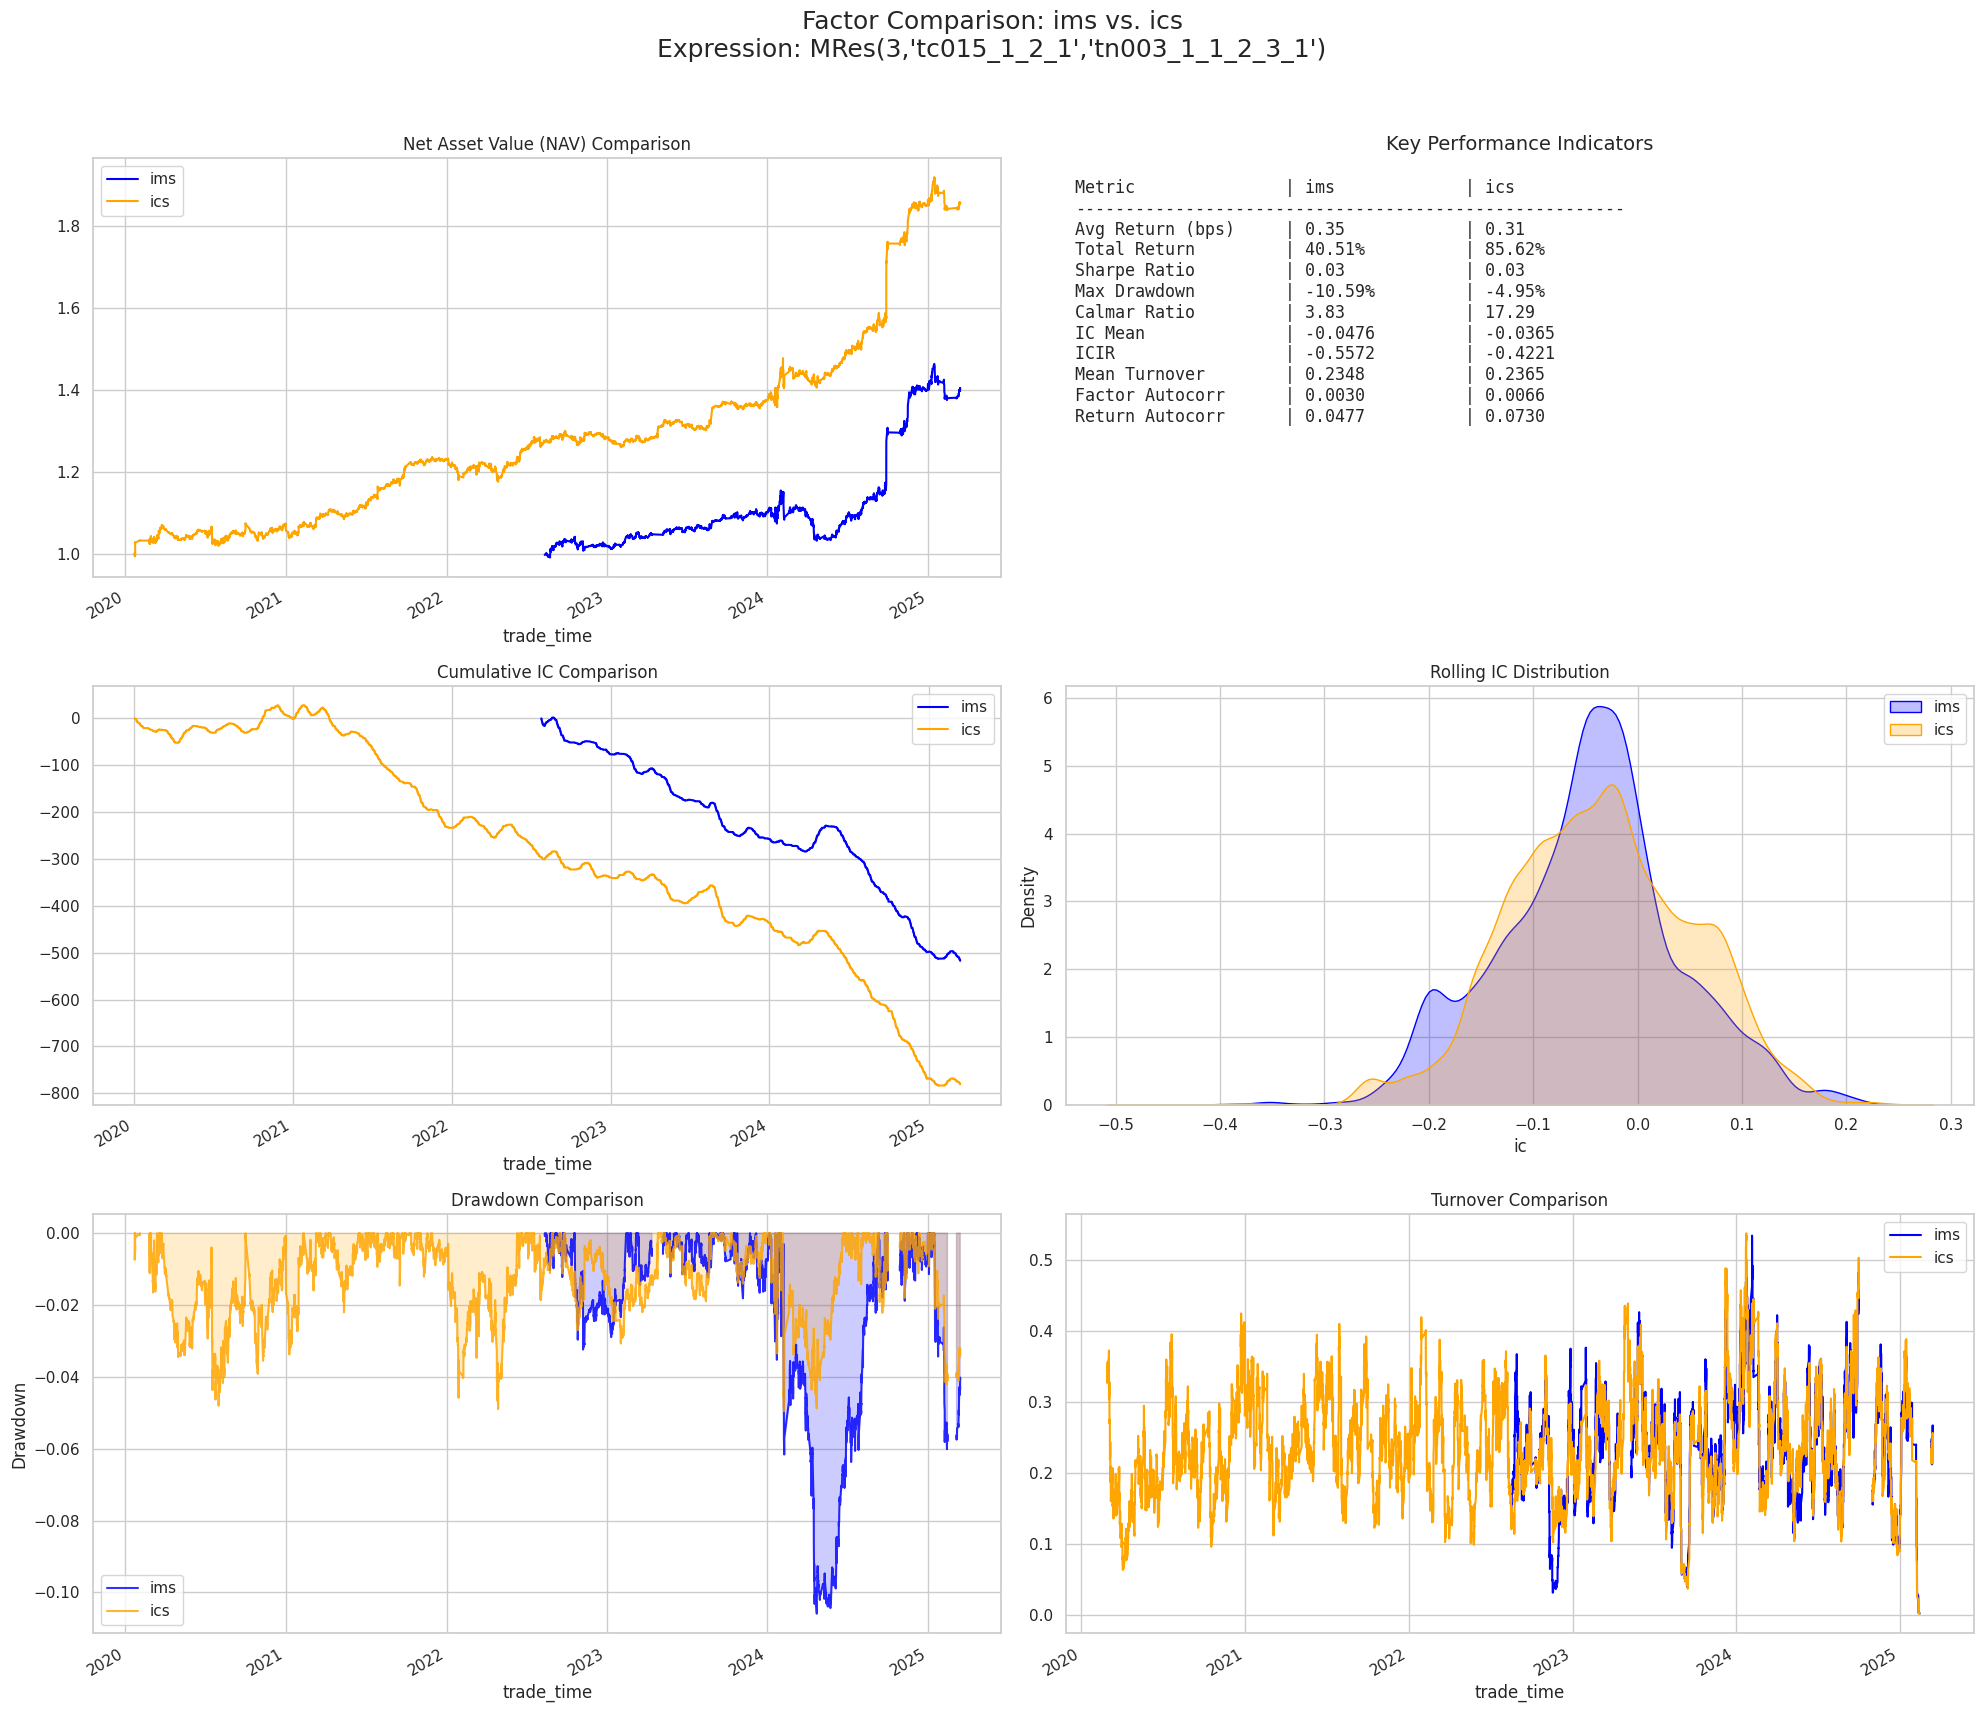

In [29]:
fc.plot_comparison()

In [30]:
fc.save_results(base_output_dir=outputs)

Saving results to: records/sel/bicso0/ims/10175820
Performance summary saved to: records/sel/bicso0/ims/10175820/performance_summary.txt
Saving time series data as separate files...
 -> Saved records/sel/bicso0/ims/10175820/ims_nav.csv
 -> Saved records/sel/bicso0/ims/10175820/ims_ic.csv
 -> Saved records/sel/bicso0/ims/10175820/ims_turnover.csv
 -> Saved records/sel/bicso0/ims/10175820/ics_nav.csv
 -> Saved records/sel/bicso0/ims/10175820/ics_ic.csv
 -> Saved records/sel/bicso0/ims/10175820/ics_turnover.csv
Comparison plot saved to: records/sel/bicso0/ims/10175820/comparison_plot.png
